# Graph Classification
In this notebook we give an example of graph classification task. We generate graphs based on following types:
- cycle,
- star,
- wheel,
- complete,
- lollipop,
- hypercube,
- circular ladder,
- grid.

With number of nodes between $[10, 20]$. Next we train A deep Graph Convolution Network (GCN) for graph classification.
Finally, we visualize the results plotting the cost/score curves. In our case we use Categorical Cross Entropy as cost
and Accuracy score.

In [1]:
import tensorflow as tf
from algomorphism.model.models import GraphConvNetworkClassifier
from algomorphism.dataset.datasets.generate import SimpleGraphsDataset
from algomorphism.method.graph import a2g
import networkx as nx
import matplotlib.pyplot as plt
from algomorphism.figure.opt import multiple_models_history_figure

In [2]:
# Optional GPU usage

# for gpu in tf.config.list_physical_devices('GPU'):
#     print(gpu)
#     tf.config.experimental.set_memory_growth(gpu, True)

## Generate graph dataset

In [3]:
examples = 1000
n_nodes_min = 10
n_nodes_max = 20
graph_types = ['cycle', 'star', 'wheel', 'complete', 'lollipop',
                'hypercube', 'circular_ladder', 'grid']

g_dataset = SimpleGraphsDataset(examples, n_nodes_min, n_nodes_max, graph_types)
g_dataset.generate_dataset()
a_train, _, _ , y_train = g_dataset.get_train_data()

## Plot graph examples

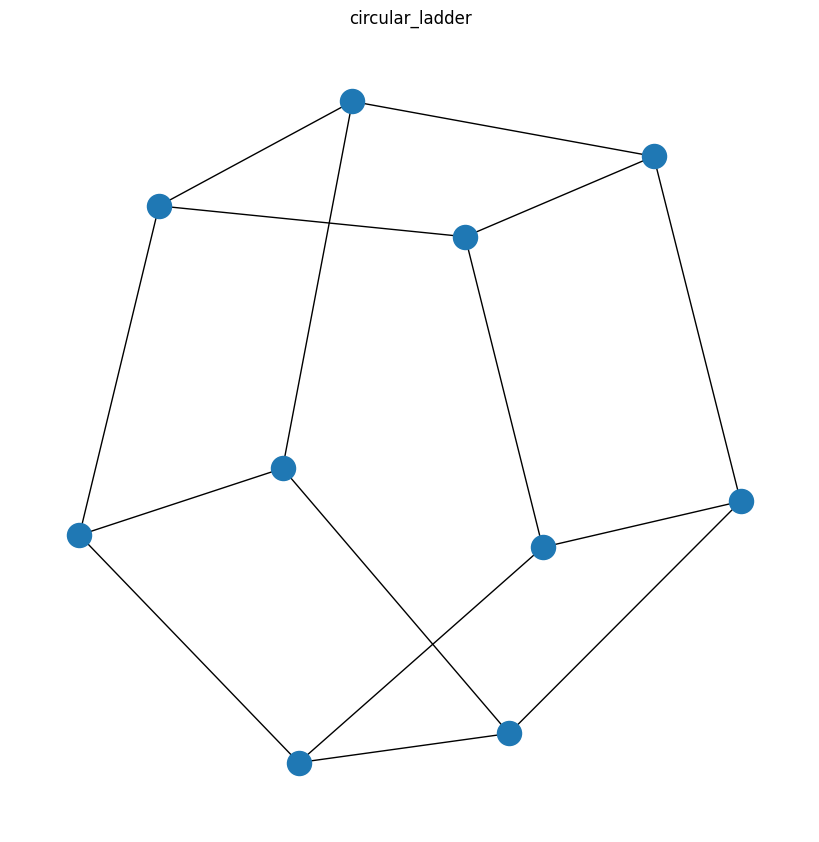

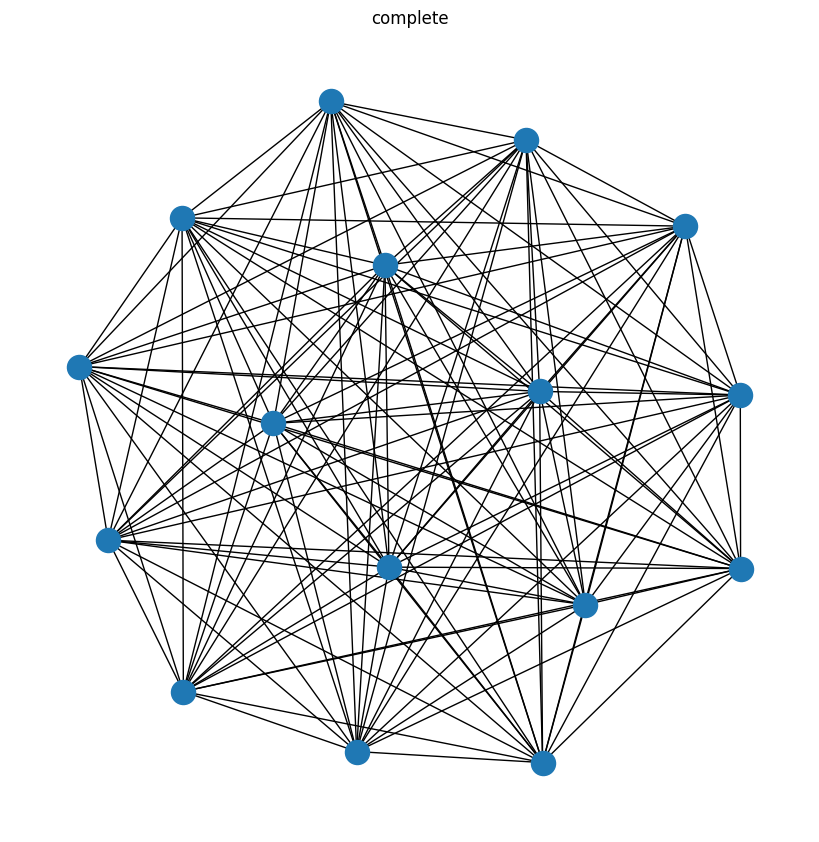

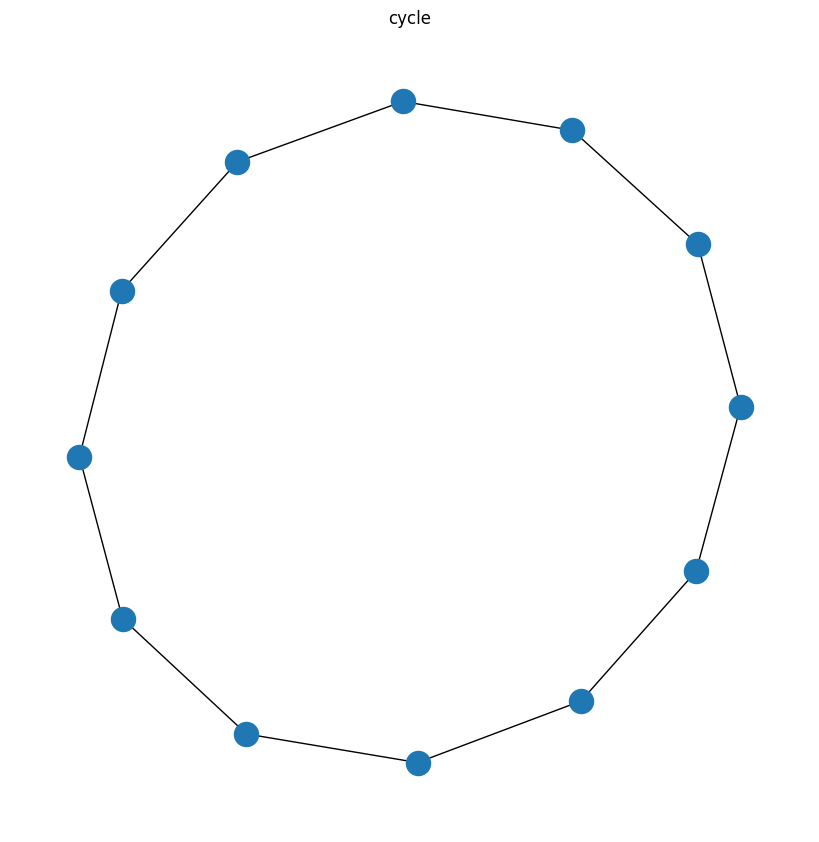

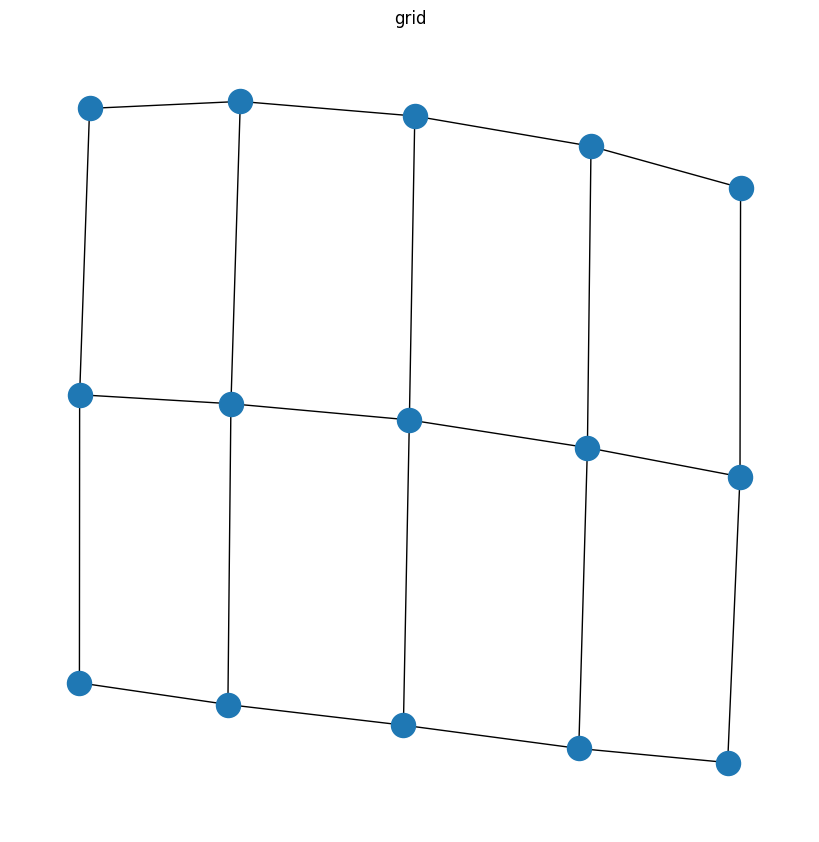

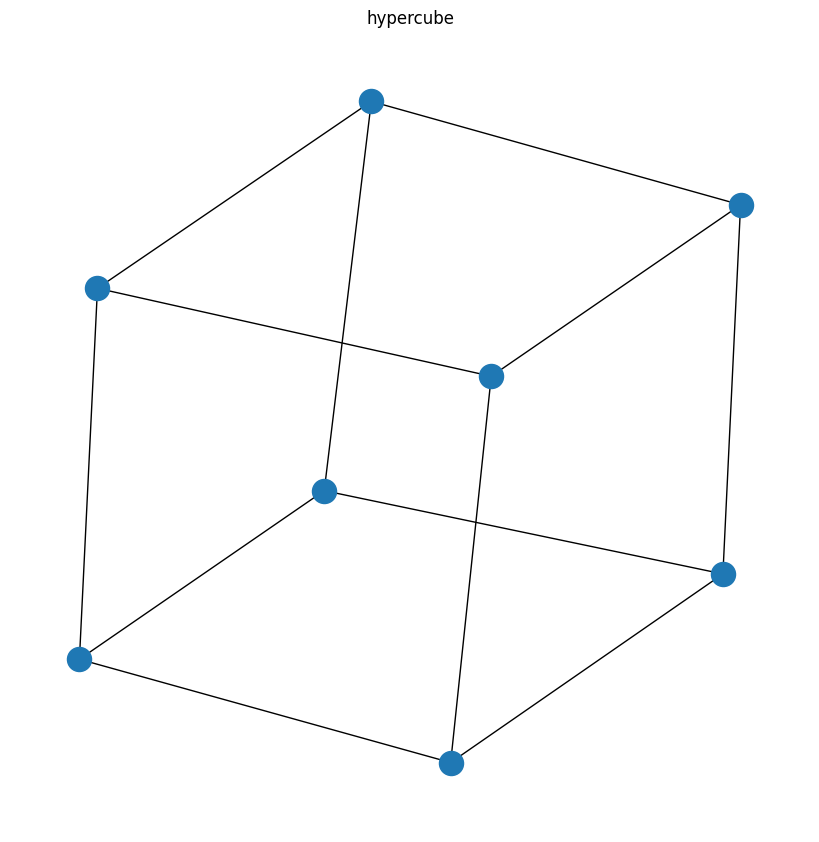

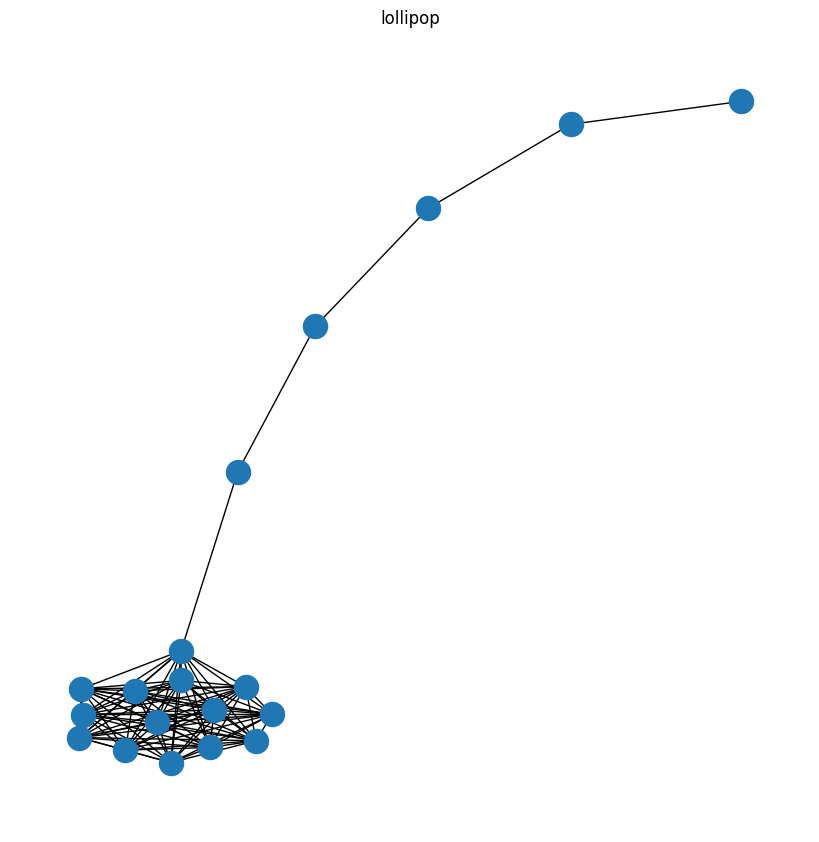

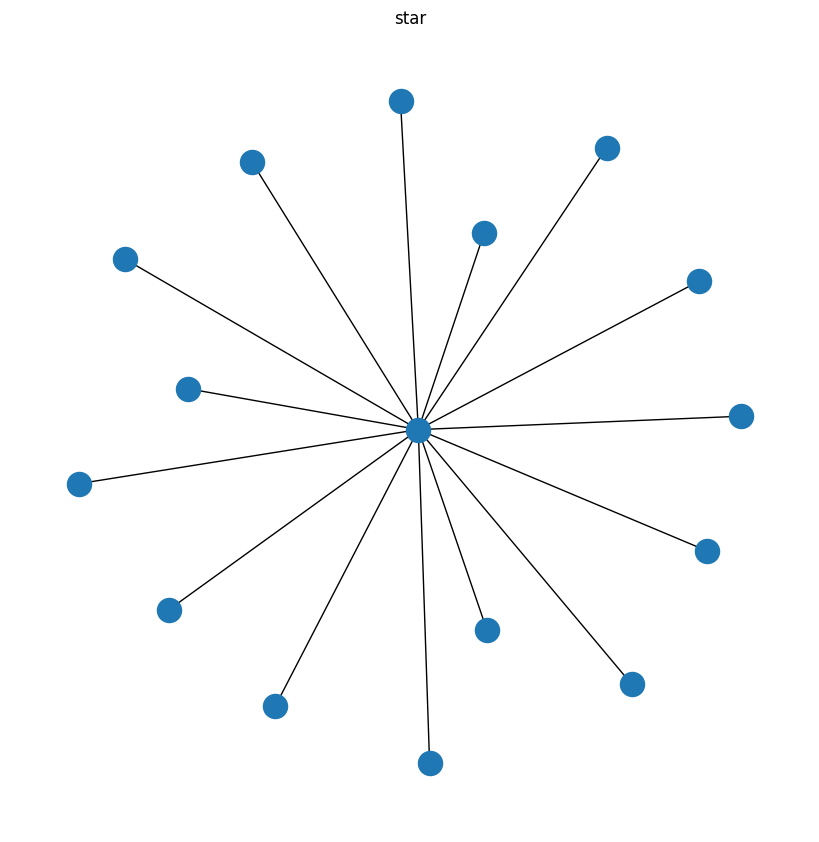

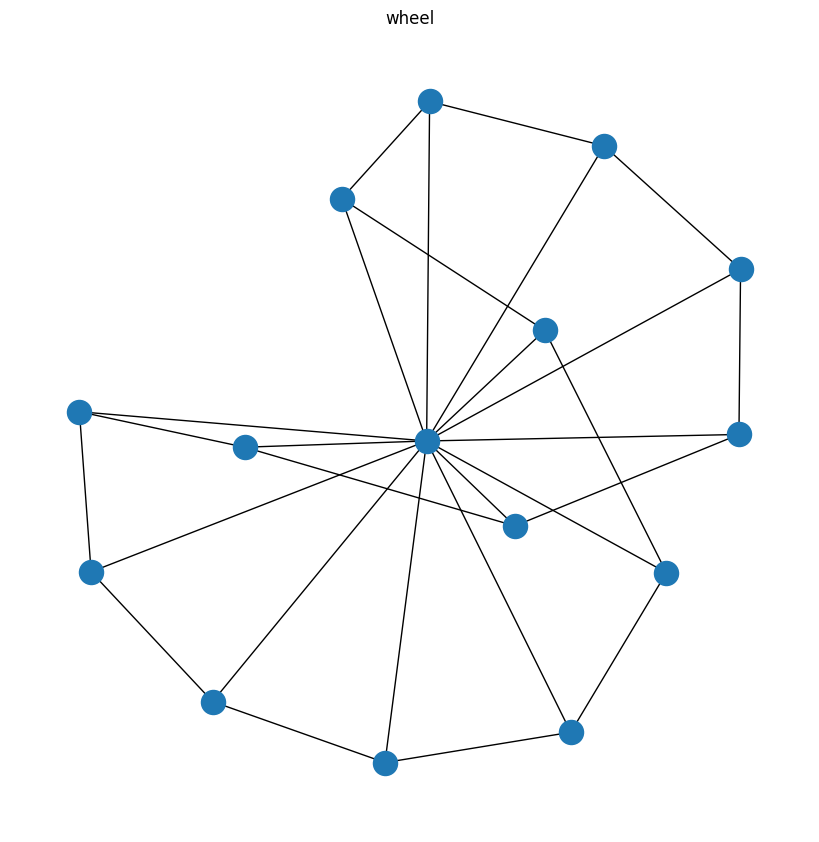

In [4]:
c = 0
c_max = y_train.shape[1]
for i in range(a_train.shape[0]):
    if c == tf.argmax(y_train[i]):
        c+=1
        g = a2g(a_train[i])
        plt.figure(figsize=(8,8))
        nx.draw(g)
        class_name = g_dataset.get_class_names_by_one_hot_vectors(y_train[i].reshape(1, -1))[0]
        plt.title(class_name)
    elif c == c_max:
        break

## Initialize & train GCN

In [5]:
input_shape = a_train.shape[1]
df_list = [
    a_train.shape[1],
    64,64,128,128
]
opt = tf.keras.optimizers.SGD(learning_rate=1e-2)
gcn = GraphConvNetworkClassifier(g_dataset, df_list=df_list, nc=len(graph_types), optimizer=opt, clip_norm=1e-0)

In [6]:
gcn.train(g_dataset, epochs=200, print_types=['train', 'val', 'test'])

Epoch 1 finished
train cost: 2.1034562587738037
train score: 0.1237500011920929
val cost: 2.0950064659118652
val score: 0.18000000715255737
test cost: 2.1100106239318848
test score: 0.07999999821186066
Epoch 2 finished
train cost: 2.0903944969177246
train score: 0.1237500011920929
val cost: 2.085697889328003
val score: 0.18000000715255737
test cost: 2.0978593826293945
test score: 0.07999999821186066
Epoch 3 finished
train cost: 2.080920934677124
train score: 0.1237500011920929
val cost: 2.078826665878296
val score: 0.18000000715255737
test cost: 2.089393377304077
test score: 0.07999999821186066
Epoch 4 finished
train cost: 2.0738701820373535
train score: 0.26374998688697815
val cost: 2.0736751556396484
val score: 0.25999999046325684
test cost: 2.0832247734069824
test score: 0.27000001072883606
Epoch 5 finished
train cost: 2.0684664249420166
train score: 0.17624999582767487
val cost: 2.0696442127227783
val score: 0.12999999523162842
test cost: 2.0786020755767822
test score: 0.1700000017

## Plot history

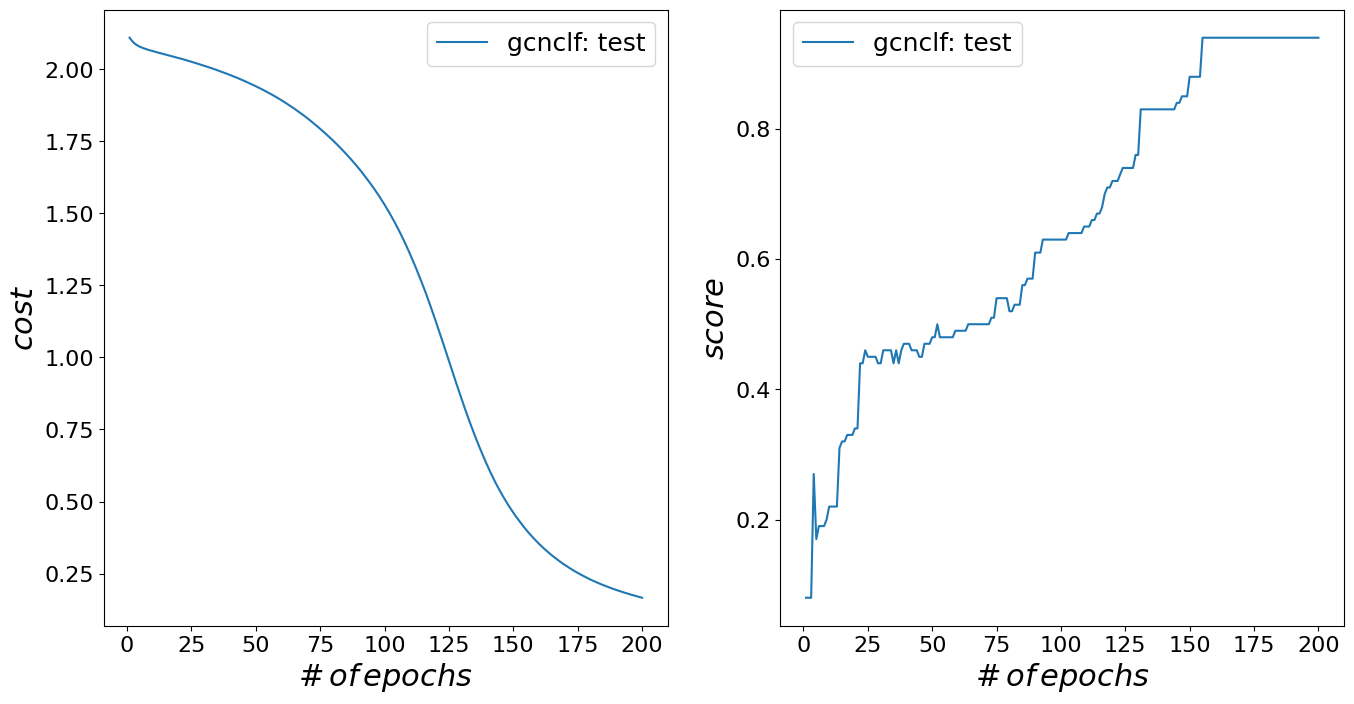

In [7]:
multiple_models_history_figure([gcn], ['test'])

In [8]:
# Test accuracy
print(gcn.score_mtr.metric_dataset(g_dataset.test))
# Test cce
print(gcn.cost_mtr.metric_dataset(g_dataset.test))

tf.Tensor(0.94, shape=(), dtype=float32)
tf.Tensor(0.16599295, shape=(), dtype=float32)


## References
- Semi-Supervised Classification with Graph Convolutional Networks, [https://arxiv.org/pdf/1609.02907.pdf](https://arxiv.org/pdf/1609.02907.pdf)
